# Урок 8. Обучение без учителя в Scikit-learn

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%config InlineBackend.figureformat = 'svg'
%matplotlib inline

In [3]:
from sklearn.manifold import TSNE

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
data = boston.data

In [8]:
data.shape

(506, 13)

In [9]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
X = pd.DataFrame(data, columns = feature_names)

In [12]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
price = boston.target

In [15]:
 from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)

In [21]:
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [23]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [24]:
tsne=TSNE(n_components=2, learning_rate=250, random_state=42)

In [25]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [26]:
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

In [27]:
X_train_tsne.shape

(404, 2)

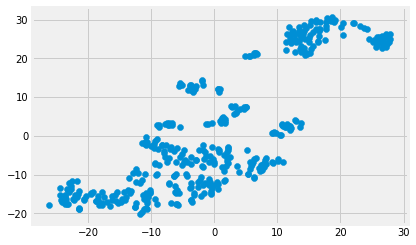

In [28]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=3)

In [31]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [32]:
pd.value_counts(labels_train)

1    191
0    128
2     85
dtype: int64

In [33]:
labels_test = kmeans.predict(X_test_scaled)

Text(16, 20, 'Кластер 0')

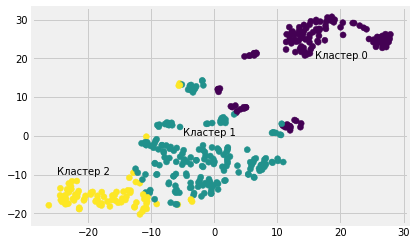

In [44]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-25, -10, 'Кластер 2')
plt.text(-5, 0, 'Кластер 1')
plt.text(16, 20, 'Кластер 0')

In [45]:
y_train.mean()

22.796534653465343

In [47]:
y_train[labels_train==0].mean()

16.1796875

In [48]:
y_train[labels_train==1].mean()

24.971204188481675

In [49]:
y_train[labels_train==2].mean()

27.87411764705882

Text(0.5, 0, 'Цена')

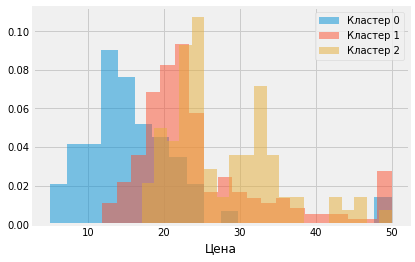

In [52]:
plt.hist(y_train[labels_train==0], bins=20, density=True, alpha=0.5 )
plt.hist(y_train[labels_train==1], bins=20, density=True, alpha=0.5 )
plt.hist(y_train[labels_train==2], bins=20, density=True, alpha=0.5 )
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

In [54]:
X_train.loc[labels_train==0, 'CRIM'].mean()

10.715219062500003

In [55]:
X_train.loc[labels_train==1, 'CRIM'].mean()

0.42098554973821983

In [56]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.0721184705882353

Text(0.5, 0, 'CRIM')

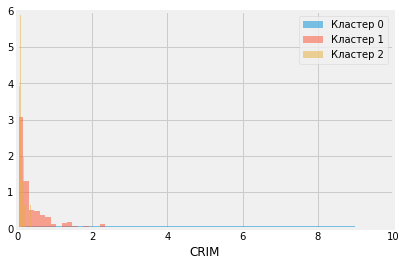

In [65]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins=20, density=True, alpha=0.5 )
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins=20, density=True, alpha=0.5 )
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins=20, density=True, alpha=0.5 )
plt.xlim(0, 10)
plt.ylim(0, 6)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')